### Linear Regression Task
- 각 광고 종목에 투자했을 때, 수익이 얼마나 발생하는지 회귀 예측 진행

In [1]:
import pandas as pd

a_df = pd.read_csv('./datasets/advertising.csv')
a_df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [2]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [3]:
# 맨 처름 feature 제외 나머지 가져오기
pre_a_df = a_df.iloc[:, 1:]

pre_a_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
pre_a_df.corr()['Sales'].sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

#### 중간 분석
- 광고 수익에 가장 많은 영향을 주는 것은 TV 광고
- 라디오, 신문 광고는 다수의 이상치가 존재하여, 일반화하기 어려움
- 각각을 타겟과 회귀 예측

### 🖥️ TV

In [5]:
tv_cols = ['TV', 'Sales']

tv_a_df = pre_a_df[tv_cols]

tv_a_df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


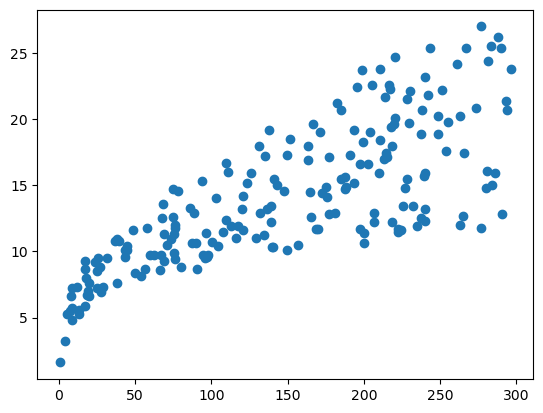

In [6]:
import matplotlib.pyplot as plt

# TV 광고 투자와 판매량의 관계를 산점도로 시각화
plt.scatter(tv_a_df['TV'], tv_a_df['Sales'])
plt.show()

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

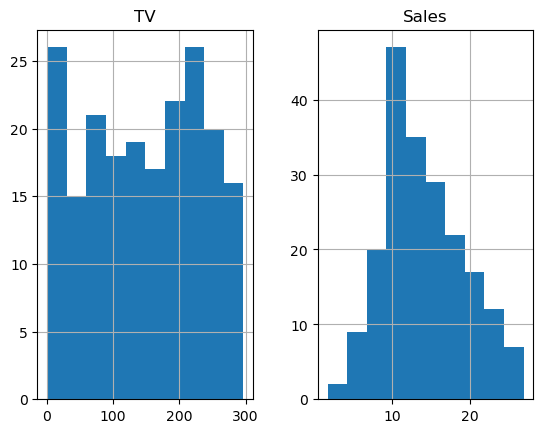

In [7]:
# 각 데이터의 분포를 히스토그램으로 시각화
tv_a_df.hist()

In [20]:
import torch
from torch.nn import Module, Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from sklearn.model_selection import train_test_split

# 시드 값 고정
torch.manual_seed(124)

# feature와 target으로 데이터 세트 분리
features, targets = tv_a_df.iloc[:, :-1], tv_a_df.iloc[:, -1]

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

In [19]:
# 회귀 분석 이전, 분리한 데이터들의 value만 가져와 tensor 타입으로 재가공
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)

# y(정답)의 경우, 마지막 컬럼 하나만 가져와서 현재 1차원 ndarray 형태
# reshape로 X(문제)와 같은 2차원(데이터 수 * 1열) tensor 타입으로 변환
y_train = torch.FloatTensor(y_train.values).reshape(-1, 1)
y_test = torch.FloatTensor(y_test.values).reshape(-1, 1)

In [10]:
# 데이터 재가공 확인
print('(x, y)')
for x, y in zip(X_train, y_train):
    print(x, y)

(x, y)
tensor([17.2000]) tensor([5.9000])
tensor([250.9000]) tensor([22.2000])
tensor([289.7000]) tensor([25.4000])
tensor([228.3000]) tensor([15.5000])
tensor([283.6000]) tensor([25.5000])
tensor([62.3000]) tensor([9.7000])
tensor([156.6000]) tensor([10.5000])
tensor([228.]) tensor([21.5000])
tensor([191.1000]) tensor([17.3000])
tensor([27.5000]) tensor([6.9000])
tensor([219.8000]) tensor([19.6000])
tensor([170.2000]) tensor([11.7000])
tensor([163.5000]) tensor([18.])
tensor([36.9000]) tensor([10.8000])
tensor([265.6000]) tensor([17.4000])
tensor([290.7000]) tensor([12.8000])
tensor([168.4000]) tensor([11.7000])
tensor([38.2000]) tensor([7.6000])
tensor([57.5000]) tensor([11.8000])
tensor([217.7000]) tensor([19.4000])
tensor([50.]) tensor([8.4000])
tensor([199.8000]) tensor([10.6000])
tensor([96.2000]) tensor([11.4000])
tensor([43.]) tensor([9.6000])
tensor([229.5000]) tensor([19.7000])
tensor([239.9000]) tensor([23.2000])
tensor([75.5000]) tensor([9.9000])
tensor([97.2000]) tensor([9

#### W, b, Loss Function을 직접 설정하는 경우 

In [11]:
# 선형 회귀 모델 선언
l_r = Linear(1, 1)

# 가중치 초기화
W = torch.zeros(1, requires_grad=True)

# 편향 초기화
b = torch.zeros(1, requires_grad=True)

# 경사 하강법
optimizer = SGD([W, b], lr=1e-5)

# 반복 횟수 설정
epochs = 2000000

# 설정한 횟수만큼 반복
for epoch in range(1, epochs + 1):
    # 새로운 가설 수립
    H = W * X_train + b

    # 가설에 따른 loss 계산
    loss = mse_loss(H, y_train)

    # 다음 기울기를 위해 기존 기울기 초기화
    optimizer.zero_grad()

    # 손실 함수 미분 후 기울기 계산
    loss.backward()

    # W, b 값 업데이트
    optimizer.step()

    # epoch 100번마다 출력
    if epoch % 100 == 0:
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}' \
              .format(epoch, epochs, W.item(), b.item(), loss.item()))

 100/2000000: W: 0.0832, b: 0.0037, loss: 22.7164
 200/2000000: W: 0.0832, b: 0.0070, loss: 22.7055
 300/2000000: W: 0.0832, b: 0.0104, loss: 22.6945
 400/2000000: W: 0.0832, b: 0.0137, loss: 22.6836
 500/2000000: W: 0.0832, b: 0.0170, loss: 22.6726
 600/2000000: W: 0.0832, b: 0.0203, loss: 22.6617
 700/2000000: W: 0.0831, b: 0.0236, loss: 22.6508
 800/2000000: W: 0.0831, b: 0.0269, loss: 22.6399
 900/2000000: W: 0.0831, b: 0.0302, loss: 22.6290
1000/2000000: W: 0.0831, b: 0.0335, loss: 22.6181
1100/2000000: W: 0.0831, b: 0.0368, loss: 22.6072
1200/2000000: W: 0.0831, b: 0.0401, loss: 22.5964
1300/2000000: W: 0.0830, b: 0.0434, loss: 22.5855
1400/2000000: W: 0.0830, b: 0.0467, loss: 22.5747
1500/2000000: W: 0.0830, b: 0.0500, loss: 22.5638
1600/2000000: W: 0.0830, b: 0.0532, loss: 22.5530
1700/2000000: W: 0.0830, b: 0.0565, loss: 22.5422
1800/2000000: W: 0.0830, b: 0.0598, loss: 22.5314
1900/2000000: W: 0.0829, b: 0.0631, loss: 22.5206
2000/2000000: W: 0.0829, b: 0.0664, loss: 22.5098


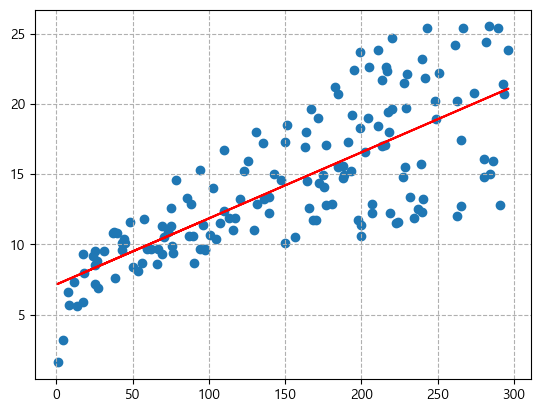

In [12]:
# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 문제와 정답의 관계를 산점도로 시각화
plt.scatter(X_train, y_train)

# 위 반복에서 얻은, loss가 최소값이 되는 가설을 선 그래프로 시각화
plt.plot(X_train, 0.047 * X_train + 7.1502, color='red')

# 플롯에 그리드 표시
plt.grid(visible=True, linestyle='--')

# 플롯 표시
plt.show()

In [13]:
import numpy as np

# 위의 선 그래프와 같은 가설 수립
H = 0.047 * X_test + 7.1502

# RMSE (Root MSE)
print(np.sqrt(mse_loss(H, y_test).item()))

3.0652761527236096


#### TV 광고 회귀 예측 결과
- TV 광고에 투자한 금액 * 0.047 + 7.1502만큼 광고 수익이 창출될 것으로 예측
- 오차는 약 3.0652

#### LinearRegressionModel 클래스 사용

In [22]:
from torch.nn import Module, Linear

# LinearRegressionModel 클래스 선언
class LinearRegressionModel(Module):
    # 클래스 실행 시
    def __init__(self):
        # 부모 클래스(torch.nn.Module) 실행
        super().__init__()
        # linear 재정의
        self.linear = Linear(1, 1)

    # LinearRegressionModel.forward 사용 시
    def forward(self, x):
        # 위에서 재정의한 linear에 전달받은 x값 넣어서 실행
        return self.linear(x)

In [15]:
# LinearRegressionModel 생성자 호출
l_r = LinearRegressionModel()
# 1e-10 = 0.0000000001 (소수점 10자리)
optimizer = SGD(l_r.parameters(), lr=1e-5)

epochs = 1047300

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()

    # 손실 함수 미분 후 기울기 계산
    loss.backward()

    # W, b 값 업데이트
    optimizer.step()

    # epoch 100번마다 출력
    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}' \
              .format(epoch, epochs, W, b, loss.item()))

 100/1047300: W: 0.0835, b: -0.0514, loss: 22.8999
 200/1047300: W: 0.0835, b: -0.0481, loss: 22.8887
 300/1047300: W: 0.0835, b: -0.0448, loss: 22.8776
 400/1047300: W: 0.0835, b: -0.0414, loss: 22.8665
 500/1047300: W: 0.0834, b: -0.0381, loss: 22.8554
 600/1047300: W: 0.0834, b: -0.0348, loss: 22.8443
 700/1047300: W: 0.0834, b: -0.0314, loss: 22.8332
 800/1047300: W: 0.0834, b: -0.0281, loss: 22.8221
 900/1047300: W: 0.0834, b: -0.0248, loss: 22.8111
1000/1047300: W: 0.0834, b: -0.0215, loss: 22.8000
1100/1047300: W: 0.0833, b: -0.0181, loss: 22.7890
1200/1047300: W: 0.0833, b: -0.0148, loss: 22.7779
1300/1047300: W: 0.0833, b: -0.0115, loss: 22.7669
1400/1047300: W: 0.0833, b: -0.0082, loss: 22.7559
1500/1047300: W: 0.0833, b: -0.0049, loss: 22.7449
1600/1047300: W: 0.0833, b: -0.0015, loss: 22.7339
1700/1047300: W: 0.0832, b: 0.0018, loss: 22.7229
1800/1047300: W: 0.0832, b: 0.0051, loss: 22.7120
1900/1047300: W: 0.0832, b: 0.0084, loss: 22.7010
2000/1047300: W: 0.0832, b: 0.0117

KeyboardInterrupt: 

In [ ]:
# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 문제와 정답의 관계를 산점도로 시각화
plt.scatter(X_train, y_train)

# 위 반복에서 얻은, loss가 최소값이 되는 가설을 선 그래프로 시각화
plt.plot(X_train, 0.047 * X_train + 7.1502, color='red')

# 플롯에 그리드 표시
plt.grid(visible=True, linestyle='--')

# 플롯 표시
plt.show()

In [ ]:
import numpy as np

# 위의 선 그래프와 같은 가설 수립
H = 0.047 * X_test + 7.1502

# RMSE (Root MSE)
print(np.sqrt(mse_loss(H, y_test).item()))

### Sklearn - LinearRegression Task

In [23]:
import torch
from torch.nn import Module, Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from sklearn.model_selection import train_test_split

# 시드 값 고정
torch.manual_seed(124)

# feature와 target으로 데이터 세트 분리
features, targets = tv_a_df.iloc[:, :-1], tv_a_df.iloc[:, -1]

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# sklearn을 통한 선형 회귀
l_r = LinearRegression()
l_r.fit(X_train, y_train)
print('W: {:.4f}, b: {:.4f}'.format(l_r.coef_[0], l_r.intercept_))

W: 0.0467, b: 7.2020


In [25]:
from sklearn.metrics import mean_squared_error

# 테스트 데이터 예측 후 loss 값 산출
prediction = l_r.predict(X_test)
print('MSE loss: {:.4f}, RMSE Loss: {:.4f}' \
      .format(mean_squared_error(y_test, prediction), \
      np.sqrt(mean_squared_error(y_test, prediction))))

MSE loss: 9.4174, RMSE Loss: 3.0688


### 📻 라디오 

In [ ]:
radio_cols = ['Radio', 'Sales']
rd_a_df = pre_a_df[radio_cols]

rd_a_df

In [ ]:
import matplotlib.pyplot as plt

# 라디오 광고 투자와 판매량의 관계를 산점도로 시각화
plt.scatter(rd_a_df['Radio'], rd_a_df['Sales'])
plt.show()

In [ ]:
# 각 데이터의 분포를 히스토그램으로 시각화
rd_a_df.hist()

In [ ]:
# 회귀 분석 이전, 분리한 데이터들의 value만 가져와 tensor 타입으로 재가공
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)

# y(정답)의 경우, 마지막 컬럼 하나만 가져와서 현재 1차원 ndarray 형태
# reshape로 X(문제)와 같은 2차원(데이터 수 * 1열) tensor 타입으로 변환
y_train = torch.FloatTensor(y_train.values).reshape(-1, 1)
y_test = torch.FloatTensor(y_test.values).reshape(-1, 1)

In [ ]:
# 데이터 재가공 확인
print('(x, y)')
for x, y in zip(X_train, y_train):
    print(x, y)

#### W, b, Loss Function을 직접 설정하는 경우

In [ ]:
# 선형 회귀 모델 선언
l_r = Linear(1, 1)

# 가중치 초기화
W = torch.zeros(1, requires_grad=True)

# 편향 초기화
b = torch.zeros(1, requires_grad=True)

# 경사 하강법
optimizer = SGD([W, b], lr=1e-5)

# 반복 횟수 설정
epochs = 1500000

# 설정한 횟수만큼 반복
for epoch in range(1, epochs + 1):
    # 새로운 가설 수립
    H = W * X_train + b

    # 가설에 따른 loss 계산
    loss = mse_loss(H, y_train)

    # 다음 기울기를 위해 기존 기울기 초기화
    optimizer.zero_grad()

    # 손실 함수 미분 후 기울기 계산
    loss.backward()

    # W, b 값 업데이트
    optimizer.step()

    # epoch 100번마다 출력
    if epoch % 100 == 0:
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}' \
              .format(epoch, epochs, W.item(), b.item(), loss.item()))

In [ ]:
# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 문제와 정답의 관계를 산점도로 시각화
plt.scatter(X_train, y_train)

# 위 반복에서 얻은, loss가 최소값이 되는 가설을 선 그래프로 시각화
plt.plot(X_train, 0.2121 * X_train + 9.3088, color='red')

# 플롯에 그리드 표시
plt.grid(visible=True, linestyle='--')

# 플롯 표시
plt.show()

In [ ]:
import numpy as np

# 위의 선 그래프와 같은 가설 수립
H = 0.2121 * X_test + 9.3088

# RMSE (Root MSE)
print(np.sqrt(mse_loss(H, y_test).item()))

#### 라디오 광고 회귀 예측 결과
- 라디오 광고에 투자한 금액 * 0.2121 + 9.3088만큼 광고 수익이 창출될 것으로 예측
- 오차는 약 4.9677
- 데이터 중 loss가 큰 것이 많아서 오차가 크게 나타남

#### LinearRegressionModel 클래스 사용

In [ ]:
from torch.nn import Module, Linear

# LinearRegressionModel 클래스 선언
class LinearRegressionModel(Module):
    # 클래스 실행 시
    def __init__(self):
        # 부모 클래스(torch.nn.Module) 실행
        super().__init__()
        # linear 재정의
        self.linear = Linear(1, 1)

    # LinearRegressionModel.forward 사용 시
    def forward(self, x):
        # 위에서 재정의한 linear에 전달받은 x값 넣어서 실행
        return self.linear(x)

In [ ]:
# LinearRegressionModel 생성자 호출
l_r = LinearRegressionModel()
# 1e-10 = 0.0000000001 (소수점 10자리)
optimizer = SGD(l_r.parameters(), lr=1e-5)

epochs = 1000000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()

    # 손실 함수 미분 후 기울기 계산
    loss.backward()

    # W, b 값 업데이트
    optimizer.step()

    # epoch 100번마다 출력
    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}' \
              .format(epoch, epochs, W, b, loss.item()))

In [ ]:
# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 문제와 정답의 관계를 산점도로 시각화
plt.scatter(X_train, y_train)

# 위 반복에서 얻은, loss가 최소값이 되는 가설을 선 그래프로 시각화
plt.plot(X_train, 0.2121 * X_train + 9.3088, color='red')

# 플롯에 그리드 표시
plt.grid(visible=True, linestyle='--')

# 플롯 표시
plt.show()

In [ ]:
import numpy as np

# 위의 선 그래프와 같은 가설 수립
H = 0.2121 * X_test + 9.3088

# RMSE (Root MSE)
print(np.sqrt(mse_loss(H, y_test).item()))

### 📰 신문

In [ ]:
newspaper_cols = ['Newspaper', 'Sales']
nw_a_df = pre_a_df[newspaper_cols]

nw_a_df

In [ ]:
import matplotlib.pyplot as plt

# 신문 광고 투자와 판매량의 관계를 산점도로 시각화
plt.scatter(nw_a_df['Newspaper'], nw_a_df['Sales'])
plt.show()

In [ ]:
# 각 데이터의 분포를 히스토그램으로 시각화
nw_a_df.hist()

In [ ]:
import torch
from torch.nn import Module, Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from sklearn.model_selection import train_test_split

# 시드 값 고정
torch.manual_seed(124)

# feature와 target으로 데이터 세트 분리
features, targets = nw_a_df.iloc[:, :-1], nw_a_df.iloc[:, -1]

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

# 회귀 분석 이전, 분리한 데이터들의 value만 가져와 tensor 타입으로 재가공
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)

# y(정답)의 경우, 마지막 컬럼 하나만 가져와서 현재 1차원 ndarray 형태
# reshape로 X(문제)와 같은 2차원(데이터 수 * 1열) tensor 타입으로 변환
y_train = torch.FloatTensor(y_train.values).reshape(-1, 1)
y_test = torch.FloatTensor(y_test.values).reshape(-1, 1)

In [ ]:
# 데이터 재가공 확인
print('(x, y)')
for x, y in zip(X_train, y_train):
    print(x, y)

#### W, b, Loss Function을 직접 설정하는 경우

In [ ]:
# 선형 회귀 모델 선언
l_r = Linear(1, 1)

# 가중치 초기화
W = torch.zeros(1, requires_grad=True)

# 편향 초기화
b = torch.zeros(1, requires_grad=True)

# 경사 하강법
optimizer = SGD([W, b], lr=1e-5)

# 반복 횟수 설정
epochs = 1000000

# 설정한 횟수만큼 반복
for epoch in range(1, epochs + 1):
    # 새로운 가설 수립
    H = W * X_train + b

    # 가설에 따른 loss 계산
    loss = mse_loss(H, y_train)

    # 다음 기울기를 위해 기존 기울기 초기화
    optimizer.zero_grad()

    # 손실 함수 미분 후 기울기 계산
    loss.backward()

    # W, b 값 업데이트
    optimizer.step()

    # epoch 100번마다 출력
    if epoch % 100 == 0:
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}' \
              .format(epoch, epochs, W.item(), b.item(), loss.item()))

In [ ]:
# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 문제와 정답의 관계를 산점도로 시각화
plt.scatter(X_train, y_train)

# 위 반복에서 얻은, loss가 최소값이 되는 가설을 선 그래프로 시각화
plt.plot(X_train, 0.0718 * X_train + 12.1196, color='red')

# 플롯에 그리드 표시
plt.grid(visible=True, linestyle='--')

# 플롯 표시
plt.show()

In [ ]:
import numpy as np

# 위의 선 그래프와 같은 가설 수립
H = 0.0718 * X_test + 12.1196

# RMSE (Root MSE)
print(np.sqrt(mse_loss(H, y_test).item()))

#### 라디오 광고 회귀 예측 결과
- 라디오 광고에 투자한 금액 * 0.0.0718 + 12.1196만큼 광고 수익이 창출될 것으로 예측
- 오차는 약 5.871
- 데이터 중 loss가 큰 것이 많아서 오차가 크게 나타남

#### LinearRegressionModel 클래스 사용

In [ ]:
from torch.nn import Module, Linear

# LinearRegressionModel 클래스 선언
class LinearRegressionModel(Module):
    # 클래스 실행 시
    def __init__(self):
        # 부모 클래스(torch.nn.Module) 실행
        super().__init__()
        # linear 재정의
        self.linear = Linear(1, 1)

    # LinearRegressionModel.forward 사용 시
    def forward(self, x):
        # 위에서 재정의한 linear에 전달받은 x값 넣어서 실행
        return self.linear(x)

In [ ]:
# LinearRegressionModel 생성자 호출
l_r = LinearRegressionModel()
# 1e-10 = 0.0000000001 (소수점 10자리)
optimizer = SGD(l_r.parameters(), lr=1e-5)

epochs = 1000000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()

    # 손실 함수 미분 후 기울기 계산
    loss.backward()

    # W, b 값 업데이트
    optimizer.step()

    # epoch 100번마다 출력
    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}' \
              .format(epoch, epochs, W, b, loss.item()))

In [ ]:
# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 문제와 정답의 관계를 산점도로 시각화
plt.scatter(X_train, y_train)

# 위 반복에서 얻은, loss가 최소값이 되는 가설을 선 그래프로 시각화
plt.plot(X_train, 0.0718 * X_train + 12.1196, color='red')

# 플롯에 그리드 표시
plt.grid(visible=True, linestyle='--')

# 플롯 표시
plt.show()

In [ ]:
import numpy as np

# 위의 선 그래프와 같은 가설 수립
H = 0.0718 * X_test + 12.1196

# RMSE (Root MSE)
print(np.sqrt(mse_loss(H, y_test).item()))